1 - The data set Vertebral column 3C.dat contains three classes. Combine DH and SL classes
into one abnormal class, divide the data into a training set (70%) and test set (30%), and do
the following.

(a) Use the module sklearn.linear model.LogisticRegression() to train a logistic regression
model with `2-regularization : use ten-fold cross validation to choose the optimal value of
the regularization parameter C over the space C = {0.01, 0.1, 1, 10} , plot the confusion
matrix, calculate sensitivity and specificity, plot the ROC curve, and calculate AUC.

(b) Use the module sklearn.tree.DecisionTreeClassifier() to train a decision tree: use tenfold cross validation to choose the optimal value of the depth of the tree over the space
max depth = {3, 4, 5, 6, 7}, plot the confusion matrix, calculate recall and precision, plot
the precision-recall curve, and calculate AUC.

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split

columns = ['Pelvic incidence', 'Pelvic tilt', 'Lumbar lordosis angle',
           'Sacral slope', 'Pelvic radius', 'Grade of spondylolisthesis', 'Class']

# load the dataset into a pd df
file_path = 'Vertebral_column_3C.dat' 
data = pd.read_csv(file_path, delimiter=' ', names=columns)
data = data.dropna()


#convert categorical into numerical data, combine DH and SL
data.loc[data["Class"].isin(["DH", "SL"]), "Class"] = 0
data.loc[data["Class"] == "NO", "Class"] = 1

data["Class"] = data["Class"].astype(int)

# split the data into training and testing
X = data.drop("Class", axis=1)
y = data["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


Confusion Matrix:
[[56  7]
 [ 8 22]]
Sensitivity: 0.7333333333333333
Specificity: 0.8888888888888888
AUC: 0.9380952380952381


<Figure size 600x500 with 0 Axes>

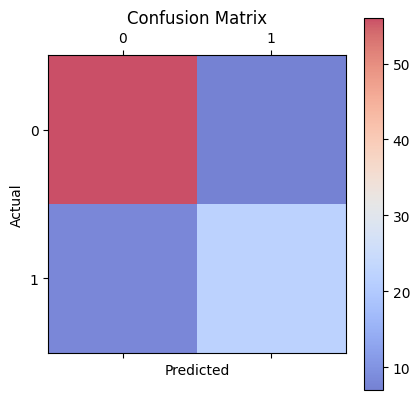

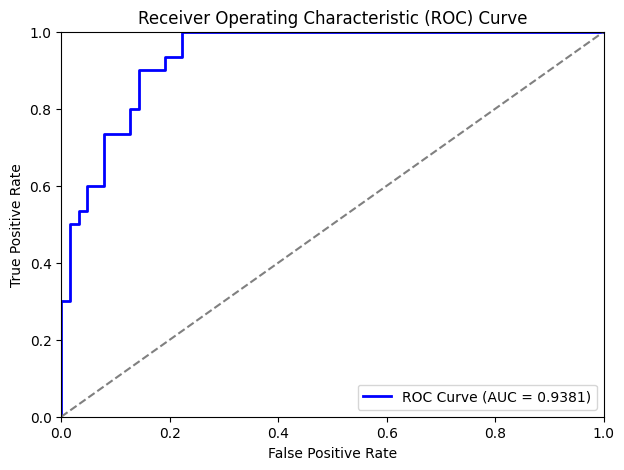

In [38]:
# part a

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report
import matplotlib.pyplot as plt

c_vals = [0.01, 0.1, 1, 10]
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
best_c = None
best_score = 0

for c in c_vals:
    model = LogisticRegression(C=c, penalty='l2', solver='liblinear')
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    mean_score = scores.mean()
    if mean_score > best_score:
        best_score = mean_score
        best_c = c

lrm = LogisticRegression(C=best_c, penalty='l2', solver='liblinear')
lrm.fit(X_train, y_train)
y_pred = lrm.predict(X_test)
y_prob = lrm.predict_proba(X_test)[:, 1]

# Confusion Matrix & calculations
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)  # Recall for class 1
specificity = tn / (tn + fp)
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

# calculate roc, auc
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

print(f"AUC: {roc_auc}")

# plot confusion matrix
plt.figure(figsize=(6, 5))
plt.matshow(conf_matrix, cmap='coolwarm', alpha=0.7)
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#plot roc
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


Confusion Matrix:
[[56  7]
 [ 8 22]]
Precision: 0.7308
Recall: 0.6333


<Figure size 600x500 with 0 Axes>

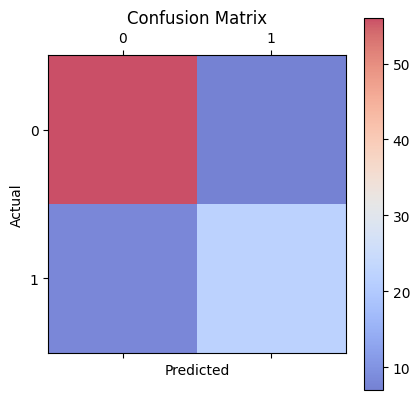

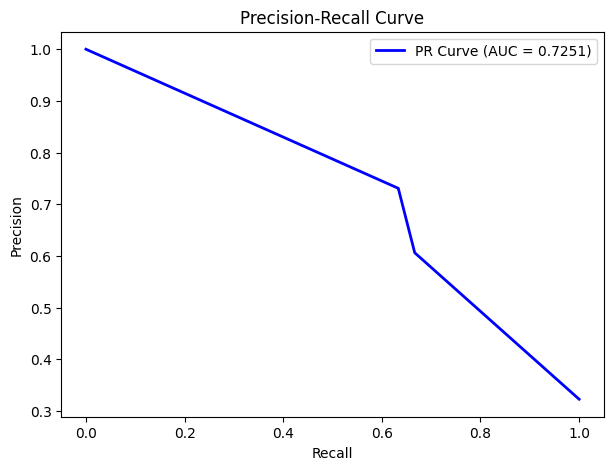

In [39]:
#part b

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, precision_score, precision_recall_curve

max_depths = [3, 4, 5, 6, 7]
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
best_depth = None
best_score = 0

for depth in max_depths:
    model = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='precision') #what is best choice for score?
    mean_score = scores.mean()
    if mean_score > best_score:
        best_depth = depth
        best_score = mean_score

dtc = DecisionTreeClassifier(criterion='gini', max_depth=best_depth, random_state=42)
dtc.fit(X_train, y_train)
y_preds = dtc.predict(X_test)
y_probs = dtc.predict_proba(X_test)[:, 1] 

#calculate confusion matrix
confu_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confu_matrix.ravel()

precision = precision_score(y_test, y_preds)
recall = recall_score(y_test, y_preds)

print(f"Confusion Matrix:\n{confu_matrix}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Precision-Recall Curve & AUC
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_probs)
pr_auc = auc(recall_vals, precision_vals)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
plt.matshow(confu_matrix, cmap='coolwarm', alpha=0.7)
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Plot Precision-Recall Curve
plt.figure(figsize=(7, 5))
plt.plot(recall_vals, precision_vals, color='blue', lw=2, label=f'PR Curve (AUC = {pr_auc:.4f})')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="upper right")
plt.show()

